<a href="https://colab.research.google.com/github/lucasswolff/Data-Analysis-Projects/blob/main/Analysing_IMDB_review%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, web scrapping was used to analyse the coments in IMDB about my favorite serie of all times: Breaking Bad 😃

In [ ]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import csv

In [ ]:
imdb_url = 'https://www.imdb.com/title/tt0903747/reviews?ref_=tt_urv'

In [ ]:
uClient = uReq(imdb_url) 
page_html = uClient.read()
uClient.close()
page_soup = soup (page_html, 'html.parser')

reviews = [review.text for review in page_soup.find_all("div", 'imdb-user-review')]

In [ ]:
len(reviews)

25

In [ ]:
reviews

["\n\n\n\n\n\n\n\n\n\n10/10\n\n\n Among the best and most addictive shows there is\n \nTheLittleSongbird13 November 2017\n\n\n'Breaking Bad' is one of the most popular rated shows on IMDb, is one of those rarities where every season has either been very positively received or near-universally acclaimed critically and where all of my friends have said nothing but great things about.Very few shows in recent memory had me so hooked from the very start that before the week was over the whole show had been watched, especially when for a lot of shows now airing watching one episode all the way through can be an endeavour. 'Breaking Bad' had that effect on me, and its reputation as one of the best, consistently brilliant and most addictive shows in many years (maybe even ever) is more than deserved in my eyes. Its weakest season is perhaps the first season, understandable as any show's first season is the one where things are still settling.Actually everything is established remarkably from t

In [ ]:
import csv
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
stop_words = set(stopwords.words('english'))
new_stop_words = ['sure', 'many', 'much', 'pregnant', 'little', 'middle','become', 'non', 'fifty', 'brother', 'wasted', 'Bryan', 'take']

for word in new_stop_words:
    stop_words.add(word)

word_tokens = []
for review in reviews:
    word_tokens = word_tokens + word_tokenize(review)
    
filtered_word_reviews = [w for w in word_tokens if not w in stop_words]

In [ ]:
adjs = [word for (word, pos) in nltk.pos_tag(filtered_word_reviews) if (pos[:2] == 'JJ')]
print(adjs[0:50])
print(len(adjs))

['addictive', 'popular', 'great', 'recent', 'start', 'whole', 'best', 'brilliant', 'addictive', 'weakest', 'first', 'understandable', 'first', 'meatier', 'stylish', 'cinematic', 'beautiful', 'amateurish', 'appropriate', 'intrusive', 'fine', 'thought-provoking', 'sense', 'humour', 'rich', 'intimate', 'tense', 'deliberate', 'bad', 'phenomenal', 'brilliant', 'first', 'eager', 'good', 'short', 'first', 'messing', 'deep', 'high', 'fine', 'calibre', 'blacker-than-black', 'good', 'good', 'interested', 'contemporary', 'couple', 'best', 'incredible', 'refusal']
687


In [ ]:
def drawWordCloud(words, filename):
    text = ''
    for w in words:
        text = text + ' ' + w
        
    mask = np.array(Image.open("Walter-White-Breaking-Bad.png")) #transforms the imagem in an array 
    
    image_colors = ImageColorGenerator(mask)  #generates the color to the word clould
    
    wordcloud = WordCloud(background_color="white", max_words=1000, mask=mask).generate(text) #generates the word clould
    
    fig, axes = plt.subplots(1,2 , figsize=(60,40))
    axes[0].imshow(mask, interpolation="bilinear") #shows the original image
    axes[1].imshow(wordcloud.recolor(color_func=image_colors,random_state=3),
           interpolation="bilinear")   #color of each word will be genarated based on the ImageColorGenerator 
    for ax in axes:
        ax.set_axis_off()   #hide the axis
    plt.savefig(filename+".png", format="png", dpi=200)  #saves the image
    plt.show() 
    

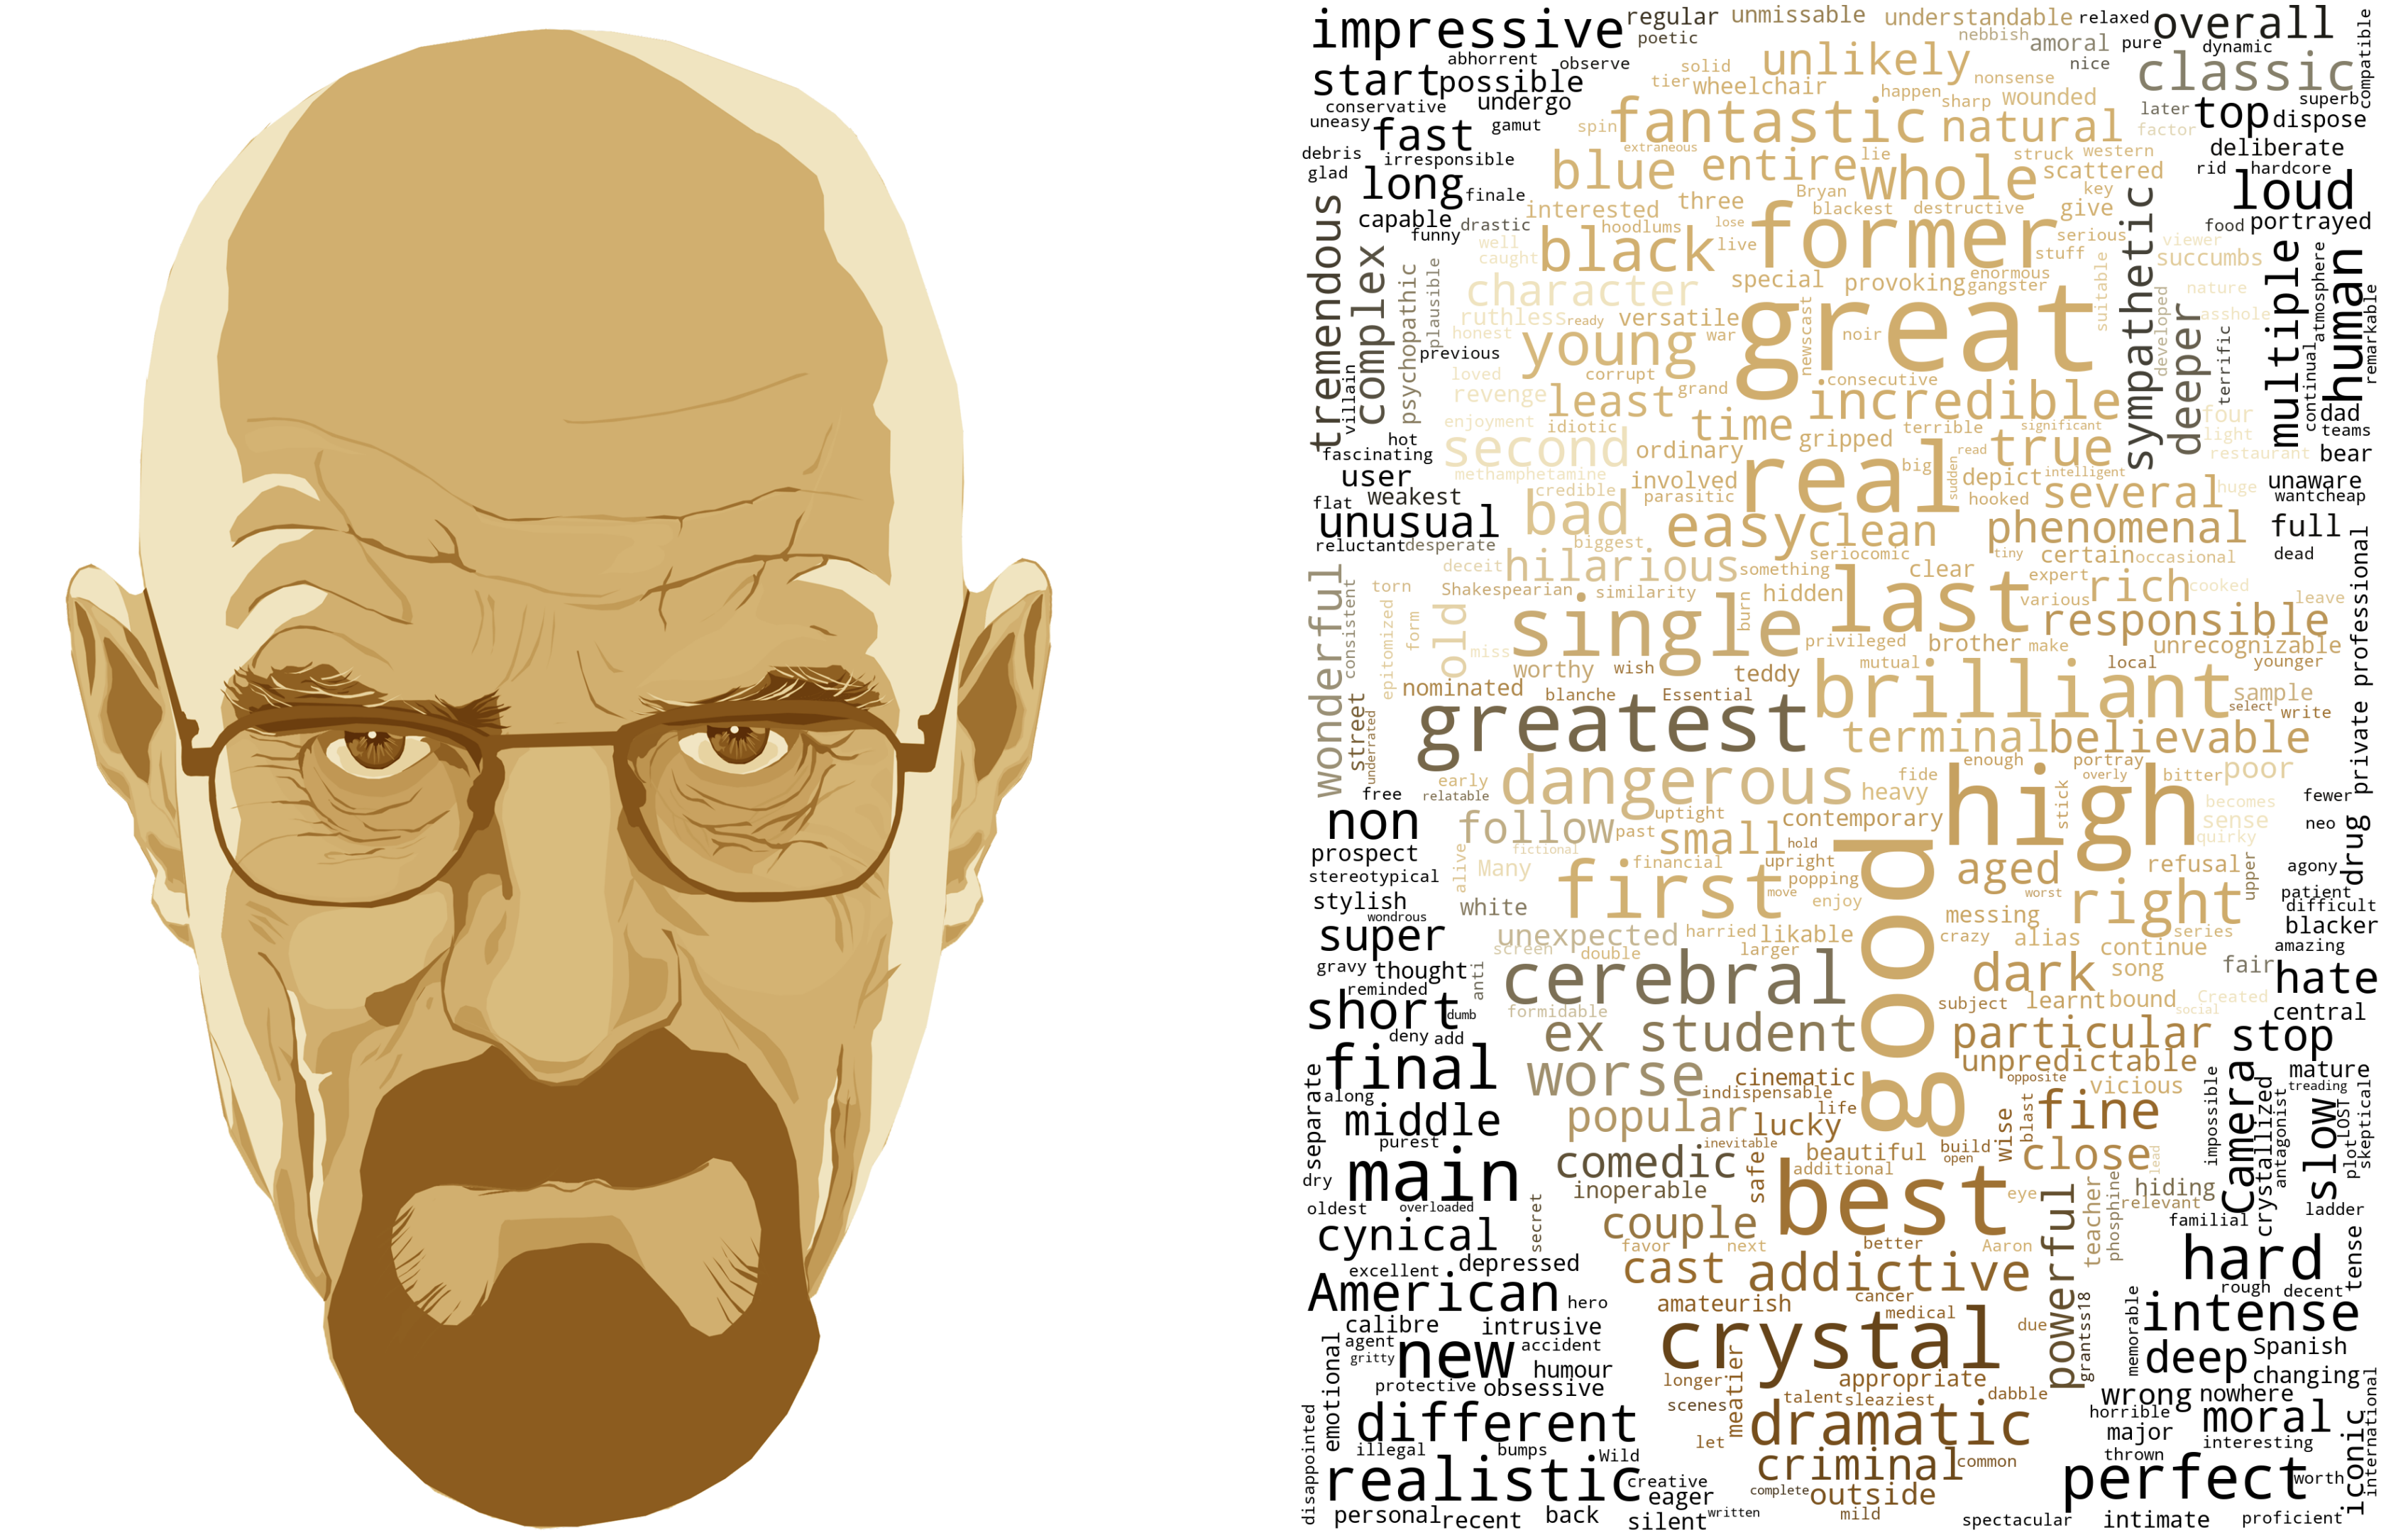

In [ ]:
drawWordCloud(adjs, "Breaking Bad Reviews")